In [306]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [307]:
flight= pd.read_csv('flights.csv')

flight.shape

(336776, 21)

In [308]:
flight.head(5)


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [309]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

# Pre Processing

In [310]:
# drop missing value 
#data_drop_missing = flight.dropna()
data=df.copy()

In [311]:
# change all non-numerical variables or variables with a categorical nature to the categorical data type

# Iterate through each column
for column in data.columns:
    # Check if the column is non-numerical or has a categorical nature
    if not pd.api.types.is_numeric_dtype(data[column]) :
        # Convert the column to the categorical data type
        data[column] = data[column].astype('category')
    #assume day part is categorical   
    
    data["year"] =data["year"].astype('category')
    data["month"] =data["month"].astype('category')
    data["day"] =data["day"].astype('category')
# Verify the updated data types
print(data.dtypes)


id                   int64
year              category
month             category
day               category
dep_time           float64
sched_dep_time       int64
dep_delay          float64
arr_time           float64
sched_arr_time       int64
arr_delay          float64
carrier           category
flight               int64
tailnum           category
origin            category
dest              category
air_time           float64
distance             int64
hour                 int64
minute               int64
time_hour         category
name              category
dtype: object


## add Calculated column to dataframe

In [312]:
#add date based on column year ,month and day
data["date"] = data['date'] = pd.to_datetime(data[['year','month','day']])
#data["date"] =data["date"].astype('category')
data.head(1)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name,date
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01


In [313]:
# add cancelled flight based on flight that has never departured and arrived
data["cancelled"] = np.where(data["dep_time"].isnull() & data["arr_time"].isnull(), 1, 0)
#data["cancelled"] =data["cancelled"].astype('category')
data.head(1)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,date,cancelled
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,0


In [314]:
# add speed 
data["speed"] = data["distance"]/data["air_time"]
data.head(1)


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,dest,air_time,distance,hour,minute,time_hour,name,date,cancelled,speed
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,0,6.167401


In [315]:
def plothist (my_data ,variable ,bin_val):      
        plt.hist(my_data[variable], bins=bin_val)      
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.title('Histogram of : ' + variable + '  bins = ' + str(bin_val))
        plt.show()
        descriptive_stats


In [316]:
def outliers_filter_IQR (mydata , variable):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr   
    # Filter the outliers from the DataFrame
    filtered_data = (data[variable] >= lower_bound) & (data[variable] <= upper_bound)
    return data[filtered_data]

In [317]:
def outliers_filter_3sigma(mydata , variable):    
    sigma_3_range = (mean_value - 3 * std_value, mean_value + 3 * std_value)    
    filtered_data =(data[variable] < sigma_3_range[0]) | (data[variable] > sigma_3_range[1])
    return data[filtered_data]

In [318]:
def statistics (data , variable) :
        
    # Compute descriptive statistics
    min_value = data[variable].min()
    max_value = data[variable].max()
    mean_value = data[variable].mean()
    median_value = data[variable].median()
    trim_mean_value = stats.trim_mean(data[variable], 0.1)  # Trim 10% from both tails
    mode_value = data[variable].mode().values[0]
    std_value = data[variable].std()
    trim_std_value = stats.mstats.trimmed_std (data[variable], limits=(0.1, 0.1))
    skewness_value = data[variable].skew()
    kurtosis_value = data[variable].kurtosis()
    # Compute sigma ranges
    sigma_1_range = (mean_value - std_value, mean_value + std_value)
    sigma_2_range = (mean_value - 2 * std_value, mean_value + 2 * std_value)
    sigma_3_range = (mean_value - 3 * std_value, mean_value + 3 * std_value)
    
    percent_within_1_sigma = stats.norm.cdf(sigma_1_range[1], mean_value, std_value) - stats.norm.cdf(sigma_1_range[0], mean_value, std_value)
    percent_within_2_sigma = stats.norm.cdf(sigma_2_range[1], mean_value, std_value) - stats.norm.cdf(sigma_2_range[0], mean_value, std_value)
    percent_within_3_sigma = stats.norm.cdf(sigma_3_range[1], mean_value, std_value) - stats.norm.cdf(sigma_3_range[0], mean_value, std_value)
    
    # Compute outliers
    outliers = data[(data[variable] < sigma_3_range[0]) | (data[variable] > sigma_3_range[1])]
    # Compute missing count
    missing_count = data[variable].isnull().sum()
    # Compute additional descriptive statistics
    range_value = max_value - min_value
    count_value = len(data[variable])
    sum_value = data[variable].sum()
    #quartiles = data[variable].quantile([0.25, 0.5, 0.75])
    #iqr_value = quartiles[0.75] - quartiles[0.25]
    
    #cv_value = (std_value / mean_value) * 100
    #skewness_test = stats.skewtest(data[variable])
    # kurtosis_test = stats.kurtosistest(data[variable])

    # Create a DataFrame to display the results
    descriptive_stats = pd.DataFrame({
        'Statistic': ['Min', 'Max', 'Mean', 'Median', 'Trim Mean', 'Mode', 'Standard Deviation', 'Trimmed Std',
                  'Skewness', 'Kurtosis', '+- 1 Sigma', '+- 2 Sigma', '+- 3 Sigma', 'OutliersCount', 'Missing Count',
                  'Range', 'Count', 'Sum',
                      #'25th Percentile', '50th Percentile', '75th Percentile', 'IQR',
                  #'Coefficient of Variation', 'Skewness Test', 'Kurtosis Test',
                'percent_within_1_sigma','percent_within_2_sigma','percent_within_3_sigma'],
        'Value': [min_value, max_value, mean_value, median_value, trim_mean_value, mode_value, std_value,
              trim_std_value, skewness_value, kurtosis_value, sigma_1_range, sigma_2_range, sigma_3_range,
              len(outliers), missing_count, range_value, count_value, sum_value,
              #quartiles[0.25], quartiles[0.5], quartiles[0.75], iqr_value, cv_value,
              #skewness_test, kurtosis_test,
                  percent_within_1_sigma*100,percent_within_2_sigma*100,percent_within_3_sigma*100]
    })
       
    # return the descriptive statistics   
    
    return descriptive_stats




# Descriptive analysis of  sched_dep_time 

In [319]:
variable = 'sched_dep_time'
descriptive_stats = statistics (df , variable) 
print(descriptive_stats)


                 Statistic                                     Value
0                      Min                                       106
1                      Max                                      2359
2                     Mean                                1344.25484
3                   Median                                    1359.0
4                Trim Mean                                1341.60364
5                     Mode                                       600
6       Standard Deviation                                467.335756
7              Trimmed Std                                 374.78573
8                 Skewness                                 -0.005858
9                 Kurtosis                                 -1.197903
10              +- 1 Sigma   (876.9190842780029, 1811.5905957467019)
11              +- 2 Sigma  (409.58332854365335, 2278.9263514810514)
12              +- 3 Sigma  (-57.75242719069615, 2746.2621072154006)
13           OutliersCount        

<div style="direction: rtl;">    در بررسی آماری زمان حرکت پرواز
     </br>
زودترین پرواز (ها) ساعت 5 صبح بوده است و دیر ترین پرواز ( ها) ساعت 23:59 شب
میانگین زمان پروازها ساعت 13:40 بوده و نیمی از پرواز ها قبل از 13:55 و نیمی دیگر پس از این زمان بوده است. با حذف 10 درصد از داده ها از انتها و ابتدا میانگین زمان حرکت پرواز ها 13:36 بوده است. بیشترین تکرار پرواز ها در ساعت 6 صبح بوده است
پراکندگی زمان پرواز از میانگین 467 بوده و پراکندگی زمان حرکت پرواز با حذف 10 درصد بزرگترین و کوچکترین داده ها 347 است. داده ها با توجه به معیار چولگی نزدیک به صفر دارای توزیع نرمال می باشند. با توجه به معیار کشیدکی منفی و اندک آن از نوع platykurtic است و براساس این آماره تعداد مقادیر پرت کم خواهد بود و توزیع داده ها یکنواخت می باشد. این موضوع در قائده 3-sigma نیز دیده می شود.

</div>    

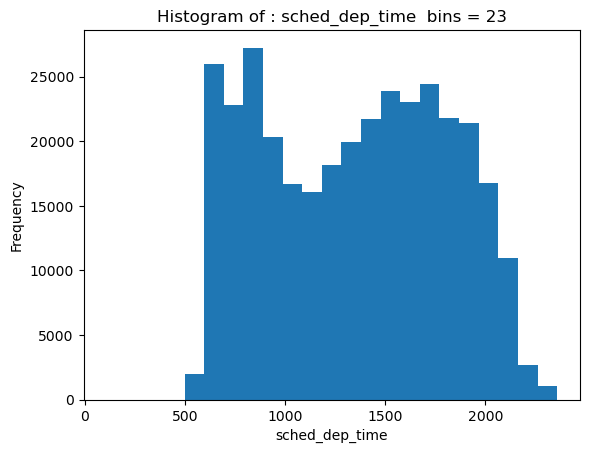

In [320]:
plothist(data , variable,23) 

<div style="direction: rtl; text-align: right;">
    بررسی هیستوگرام زمان حرکت پرواز
 <p style="text-align: right;" > 
 توزیع زمان حرکت پرواز: اکثر پروازها (با توجه به بیشترین فرکانس) دارای زمان حرکت پرواز بین حدود 6 و 18 دقیقه هستند    

</br> 
 تعداد پروازهای قبل ازساعت 5  و پروازهای بعد از ساعت 20  نسبتاً کمتر است
</br>
در نمودار دارای پیک صبح و در بعد از ظهر هم پیک پرواز وجود دارد 

</div>   

# Descriptive analysis of  dep_delay

In [321]:
variable = 'dep_delay'
descriptive_stats = statistics (data , variable) 
print(descriptive_stats)


                 Statistic                                     Value
0                      Min                                     -43.0
1                      Max                                    1301.0
2                     Mean                                  12.63907
3                   Median                                      -2.0
4                Trim Mean                                  4.798201
5                     Mode                                      -5.0
6       Standard Deviation                                 40.210061
7              Trimmed Std                                  14.75591
8                 Skewness                                  4.802541
9                 Kurtosis                                 43.950116
10              +- 1 Sigma  (-27.570990634802193, 52.84913114941161)
11              +- 2 Sigma    (-67.7810515269091, 93.05919204151851)
12              +- 3 Sigma    (-107.991112419016, 133.2692529336254)
13           OutliersCount        

<div style="direction: rtl; text-align: right;">
    مشاهده می شود که تعجیل در حرکت پرواز وجود داشته و بیشترین تعجیل 43 دقیقه بوده است.
</br>
    بیشترین تاخیر در مبدا هم 13 ساعت بوده است
</br>
ولی متوسط تاخیر در مبدا پروازها 12 دقیقه است
</br>
بیشتر پرواز ها 5 دقیقه زود تر حرکت کرده اند
</br>
<p style="direction: rtl; text-align: right;">
با توجه به وجود چولگی به سمت مثبت مقادیر بزرگتر از میانگین در توزیع داده ها وجود دارد و داده ها در قسمت بزرگتر از میانگین گستردگی بیشتر دارند 
</p>
با توجه کشیدگی مثبت تجمع داده ها در حول میانه بیشتر خواهد بود در این داده یعنی تعداد  تاخیر ها با مفادیر کم و نزدیک به صفر بیشتر از تعداد تاخیر های بزرگ است این موضوع در هیستو گرام هم قابل مشاهده است 
</br>
همچنین تعداد داده های پرت در این داده وجئ دارد
</div>

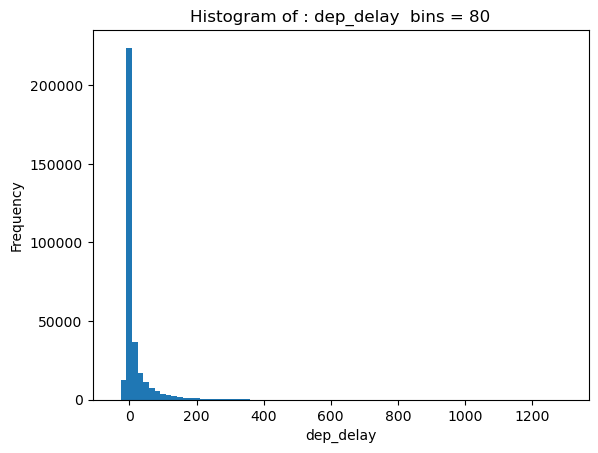

In [322]:
plothist(data , variable,80) 

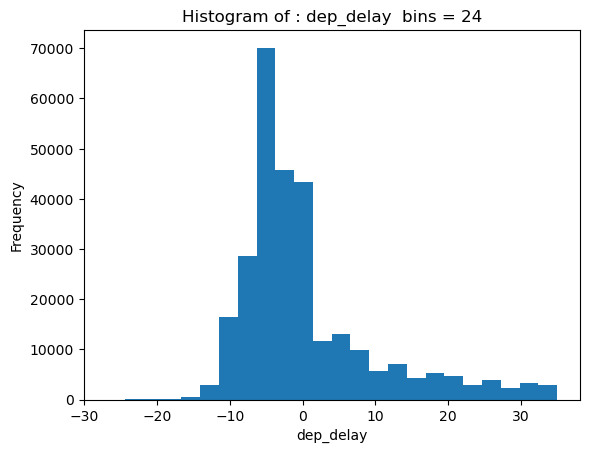

In [323]:
# filter outliers
my_data = outliers_filter_IQR (data, variable)
plothist(my_data , variable,24) 

# انتخاب سه شرکت پروازی برتر بر حسب دو فاکتور 
# 1- پایینترین میانگین مدت تاخیر در مبدا 
# 2- پایین ترین نرخ  پرواز های کنسل شده به کل پرواز ها
# دراین تحلیل اهمیت نرخ پایین  کنسلی بیشتر ازمیانگین تاخیر کمتر است

In [327]:
import pandas as pd

# Filter the data for flights with departure delays or cancellations
average_delay = data.groupby('carrier')['dep_delay'].mean()
cancelled_counts = data[data['cancelled'] == 1].groupby('carrier').size()
total_flights = data.groupby('carrier').size()
proportion_cancelled = (cancelled_counts / total_flights) * 100



# Calculate the percentage of delayed and cancelled flights for each carrier

print("average_delay :")
print(average_delay.sort_values(ascending=True))
print("proportion_cancelled :")
print(proportion_cancelled.sort_values(ascending=True))


# Define weights for each measure
weight_delay = 0.4  # Weight for departure delay portion
weight_cancellation = 0.6 # Weight for cancellation portion


score = (weight_delay * average_delay) + (weight_cancellation * proportion_cancelled)
print(score)
# Sort the airline companies based on the score in descending order
sorted_airlines = score.sort_values(ascending=True)

# Select the top three airline companies
top_three_airlines = sorted_airlines.head(3)

print("Top three airline companies based on the factors of average departure delay and cancellation rate:")
print(top_three_airlines)



average_delay :
carrier
US     3.782418
HA     4.900585
AS     5.804775
AA     8.586016
DL     9.264505
MQ    10.552041
UA    12.106073
OO    12.586207
VX    12.869421
B6    13.022522
9E    16.725769
WN    17.711744
FL    18.726075
YV    18.996330
EV    19.955390
F9    20.215543
Name: dep_delay, dtype: float64
proportion_cancelled :
carrier
HA    0.000000
AS    0.280112
F9    0.437956
VX    0.600542
DL    0.725421
B6    0.852933
UA    1.169351
WN    1.564155
AA    1.943231
FL    2.239264
US    3.228477
MQ    4.674774
EV    5.200007
9E    5.655471
YV    9.317804
OO    9.375000
dtype: float64
carrier
9E    10.083591
AA     4.600345
AS     2.489977
B6     5.720769
DL     4.141054
EV    11.102160
F9     8.348991
FL     8.833988
HA     1.960234
MQ     7.025680
OO    10.659483
UA     5.544040
US     3.450053
VX     5.508094
WN     8.023190
YV    13.189214
dtype: float64
Top three airline companies based on the factors of average departure delay and cancellation rate:
carrier
HA    1.960234
A

 
 # تحلیل همبستگی



In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Convert non-numeric columns to numeric representations
    df_encoded = pd.get_dummies(df)

    # Compute the correlation matrix
    correlation_matrix = df_encoded.corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate the correlation plot using seaborn
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax)

    # Set the title of the plot
    ax.set_title('Correlation Matrix')

    # Display the plot
    plt.show()


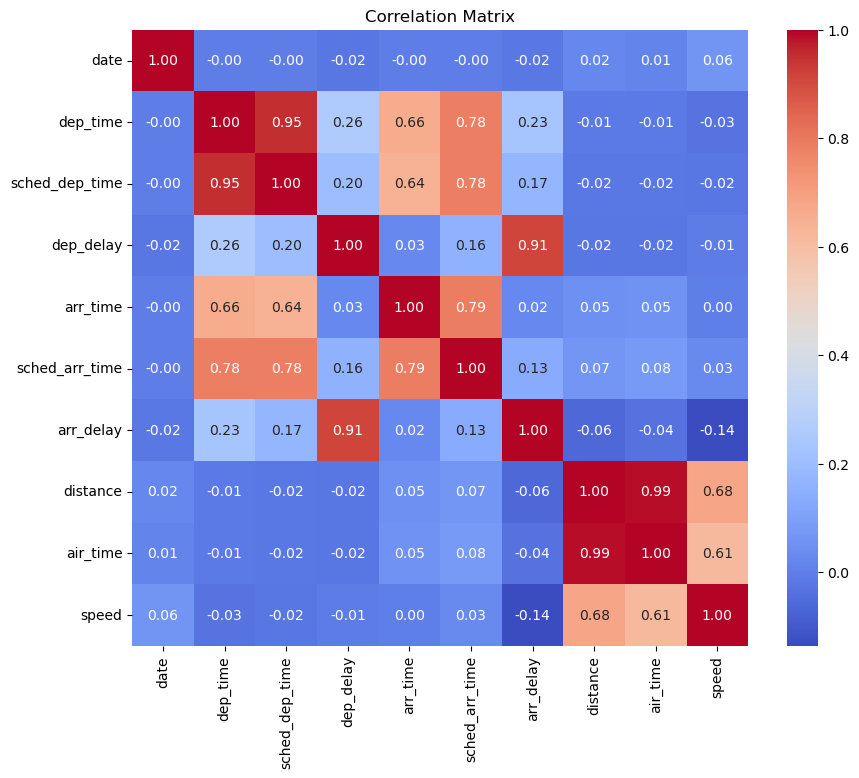

In [326]:

my_data = data[["date" , "dep_time" , "sched_dep_time" ,"dep_delay","arr_time" ,"sched_arr_time",
                "arr_delay","distance","air_time","speed"]]
plot_correlation_matrix (my_data)



<div style="direction: rtl;">    
 در نمودار بالا رابطه همبستگی بین متغیر های مختلف نشان داده شده است 
به عنوان مثال فاصله پرواز و مدت پرواز ارتباط مستقیم دارند distance  و air_time
هر چه تاخیر حرکت پرواز بیشتر باشد تاخیر رسیدن نیز بیشتر خواهد بود</br>
با توجه به همبستگی مثبت سرعت و مدت زمان پرواز به نظر می رسد هواپیماهایی که سرعت بالاتری دارند، معمولاً مدت زمان پرواز بیشتری دارند این میتواند مربوط به شرایط هوایی ، فاصله  و... بستگی داشته باشد به عنوان مثال هواپیما در یک مقصد میانی سوخت گیری کرده باشد</br>. 
این موارد با فرض خطی بودن رابطه این متغیر ها در نظر گرفته شده است و از عوامل تاثیر گذار بر رابطه همبستگی مانند داده های نویز و ... صرف نظر شده است.
همچنین با استفاده از این آماره فقط می توان فرضیه هایی را در نظر گرفت که برای تایید یا رد آن نیاز به تحلیل بیشتر می باشد

</div>

In [ ]:
# simin Alavizadeh